In [6]:
import random
from datetime import datetime
import sys
import json

sys.path.append("..")
from app.models.spectrum_pb2 import Spectrum

In [45]:
x = []
y1 = []
y2 = []

for i in range(5000, 1000000, 5000):
    x.append(i)

    d = []
    sd_u = []
    sd_l = []
    x_max = i
    y_max = 20
    for i in range(x_max):
        d.append(random.randrange(5, y_max - 1, 5))
        sd_u.append(0.4)
        sd_l.append(0.4)

    text_payload = {
        "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "x_min": 0,
        "x_max": x_max,
        "y_min": 1,
        "y_max": y_max,
        "data": d,
        "sd_u": sd_u,
        "sd_l": sd_l,
    }
    y1.append(sys.getsizeof(json.dumps(text_payload).encode("utf-8")))

    protobuf_payload = Spectrum(
        timestamp=datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        x_min=0,
        x_max=x_max,
        y_min=1,
        y_max=y_max,
        data=d,
        sd_u=sd_u,
        sd_l=sd_l,
    )
    
    y2.append(sys.getsizeof(protobuf_payload.SerializeToString()))

    # print(
    #     f'{sys.getsizeof(json.dumps(text_payload).encode("utf-8"))}, {sys.getsizeof(protobuf_payload.SerializeToString())}'
    # )



In [46]:
len(y2)

199

In [53]:
import matplotlib.pyplot as plt

# plt.style.use(['ggplot'])

# plt.rc('axes', titlesize=18)     # fontsize of the axes title
# plt.rc('axes', labelsize=14)     # fontsize of the x and y labels
# plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
# plt.rc('legend', fontsize=13)    # legend fontsize
# plt.rc('font', size=13)          # controls default text sizes

plt.figure(figsize=(8,4), tight_layout=True)


<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

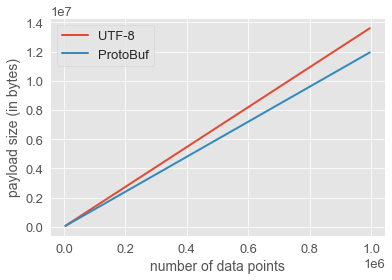

In [54]:

plt.plot(x, y1, '-', linewidth=2, label="UTF-8")
plt.plot(x, y2, '-', linewidth=2, label = "ProtoBuf")
plt.xlabel('number of data points')
plt.ylabel('payload size (in bytes)')
# plt.title('Two or more lines on same plot with suitable legends ')
plt.legend(title_fontsize=13)
plt.show()